<a href="https://colab.research.google.com/github/shoabahamed/khanacademy-statistics-and-probability/blob/main/plotting_normal_distribution_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2>PRACTICE</h2>
<H3>Create the same plot in excel but with more functions such as making probability guesses such as what is probability of a value being in between a and b</H3>

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, kde
import seaborn as sns

In [8]:
datas = np.arange(-20, 21, 1)
datas

array([-20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10,  -9,  -8,
        -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,   3,   4,   5,
         6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,
        19,  20])

In [9]:
def get_variance(datas):
    mean = np.mean(datas)
    deviation_sum = np.sum(np.square(datas-mean))
    return deviation_sum/len(datas)
    
def get_zscore(datas, miu, std):
    return (datas - miu)/std

In [10]:
def get_normal_values(datas, miu=5, variance=25):
    std = np.sqrt(variance)
    zscore = get_zscore(datas, miu, std)

    denominator = np.sqrt(2*np.pi*variance)
    nominator = np.exp(-((zscore*zscore)/2))

    return nominator / denominator


In [11]:
variance = get_variance(datas)
mean = np.mean(datas)
print(f"The mean of the datas is {mean}")
print(f"The variance of the datas is {variance}")

The mean of the datas is 0.0
The variance of the datas is 140.0


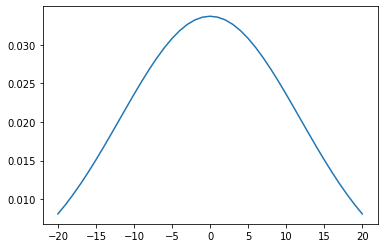

In [12]:
normal_vals = get_normal_values(datas, miu=0, variance=140)
plt.plot(datas, normal_vals)
plt.show()

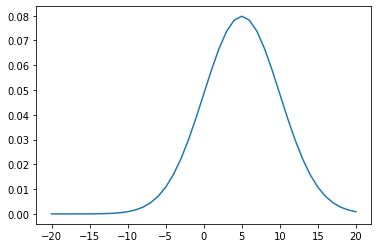

In [13]:
normal_vals = get_normal_values(datas, miu=5, variance=25)
plt.plot(datas, normal_vals)
plt.show()

<P>Now lets try to plot the probability density function through scypi</P>

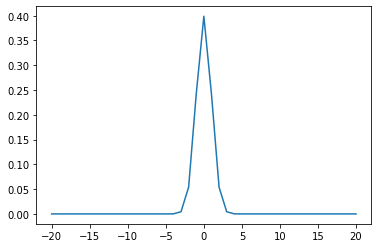

In [37]:
pdf_values = norm.pdf(datas)
plt.plot(datas, pdf_values)
plt.show()

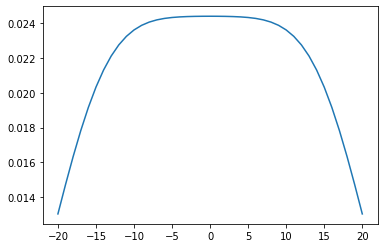

In [33]:
ked = kde.gaussian_kde(datas)
plt.plot(datas, ked(datas))
plt.show()

<p>We can see that although the graphs are still probability density graphs they looks kinda funky and weird. Lets how seaborn kdeplot shows us</p>

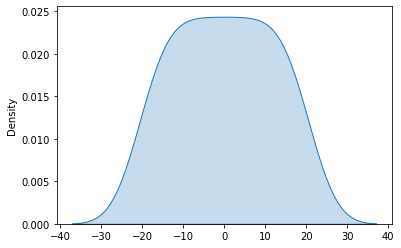

In [40]:
sns.kdeplot(datas, shade=True)

In [41]:
cars = sns.load_dataset('mpg').dropna()
cars

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger
